# Individual Planning Report
**Author:** Anson Lam

## 1\. Data Description

In [11]:
players <- read_csv("https://raw.githubusercontent.com/lamacy/dsci100_project/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/lamacy/dsci100_project/refs/heads/main/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# players.csv:
**196 observations**
| Variable Name | Type | Description | Potential Issues |
|---------------|-------------|--------------------------------------------|----------------------------|
| experience   | Factor      | The player's experience level   | None |
| subscribe    | Logical     | Subscribed to mailing list or not | None |
| hashedEmail  | Character   | Encrypted email identifier      | None |
| played_hours | Numeric     | Total hours played              | None |
| name         | Character   | Player's first name             | None |
| gender       | Factor      | Gender of player                | None |
| Age          | Numeric     | Age of player                   | 2 missing values|


In [28]:
players_summary <- players |>
 select(Age, played_hours) |>
 summarise(across(everything(),
                  list(mean = ~mean(., na.rm = TRUE),
                       median = ~median(., na.rm = TRUE),
                       sd = ~sd(., na.rm = TRUE),
                       min = ~min(., na.rm = TRUE),
                       max = ~max(., na.rm = TRUE))))

players_summary        

Age_mean,Age_median,Age_sd,Age_min,Age_max,played_hours_mean,played_hours_median,played_hours_sd,played_hours_min,played_hours_max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20.52062,19,6.174667,8,50,5.845918,0.1,28.35734,0,223.1


# sessions.csv: 
**1535 observations**
| Variable Name | Type | Description | Potential Issues |
|---------------|-------------|--------------------------------------------|----------------------------|
| hashedEmail   | Character      | Encrypted email identifier   | None |
| start_time    | Datetime     | Start of session | None |
| end_time   | Datetime   | End of session      | 2 missing values |
| original_start_time | Numeric     | Original start time             | None |
| original_end_time   | Numeric   | Original end time             | 2 missing values |


In [29]:
sessions_summary <- sessions |>
  summarise(across(where(is.numeric),
                   list(mean = ~mean(., na.rm = TRUE),
                        median = ~median(., na.rm = TRUE),
                        sd = ~sd(., na.rm = TRUE),
                        min = ~min(., na.rm = TRUE),
                        max = ~max(., na.rm = TRUE))))
sessions_summary

original_start_time_mean,original_start_time_median,original_start_time_sd,original_start_time_min,original_start_time_max,original_end_time_mean,original_end_time_median,original_end_time_sd,original_end_time_min,original_end_time_max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.719201e+12,1.7192e+12,3557491589,1.7124e+12,1.72733e+12,1.719196e+12,1.71918e+12,3552813134,1.7124e+12,1.72734e+12


## 2\. Question

**Broad Question:** What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
**Specific Question:** Can age and hours played predict whether or not a player is subscribed to the newsletter mailing list?

The question will be answered using KNN classification, using the predictors Age and played_hours in order to classify players as subscribed or not subscribed to the newsletter. To perform this, we would need to normalize and standardize through scaling the variables, split the dataset into training and testing subsets, and then the training set further into a validation set, which I will use to cross-validate to determine the ideal value of k to make sure that the model predicts the subscription status accurately. Missing values would be identified and decided whether or not it would be removed.

## 3\.  Exploratory Data Analysis and Visualization

In [55]:
players <- read_csv("https://raw.githubusercontent.com/lamacy/dsci100_project/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/lamacy/dsci100_project/refs/heads/main/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [56]:
players_mean <- players |>
  select(Age, played_hours) |>
  summarise(across(
    everything(),
    ~ mean(.x, na.rm = TRUE),
    .names = "{.col}_mean"
  ))

players_mean

Age_mean,played_hours_mean
<dbl>,<dbl>
20.52062,5.845918


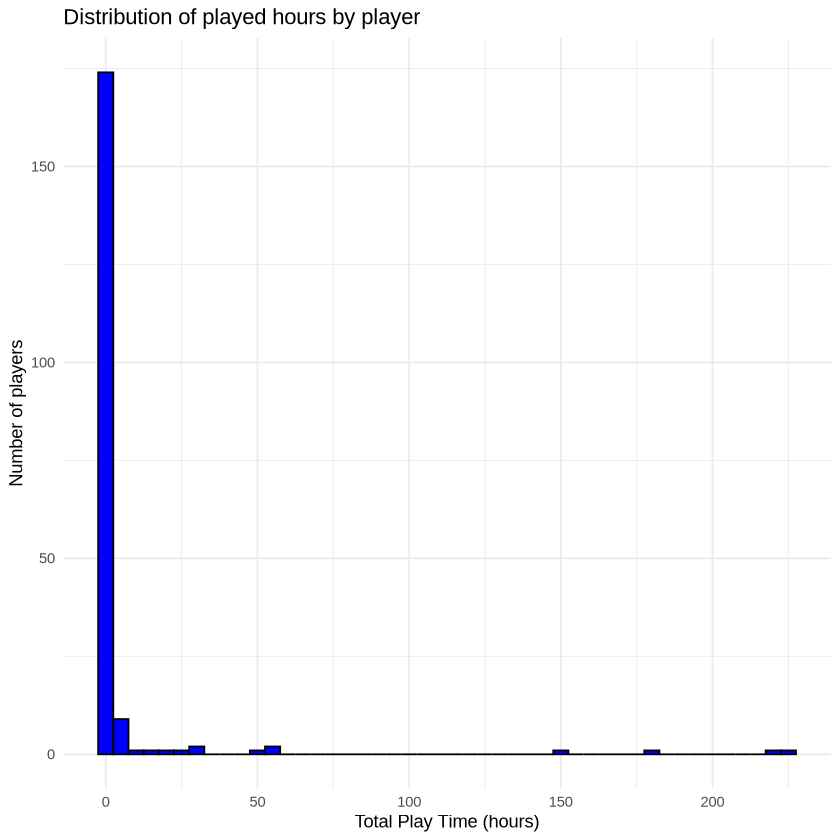

In [57]:
ggplot(players, aes(x = played_hours)) +
geom_histogram(binwidth = 5, fill = "blue", color = "black") + 
labs(title = "Distribution of played hours by player", x = "Total Play Time (hours)", y = "Number of players") +
theme_minimal()

The historgram shows that there are a large amount of players that have played very little to 0 hours, indicating a positive skew, with the majority of players having very little hours played, while some users play significantly more hours.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


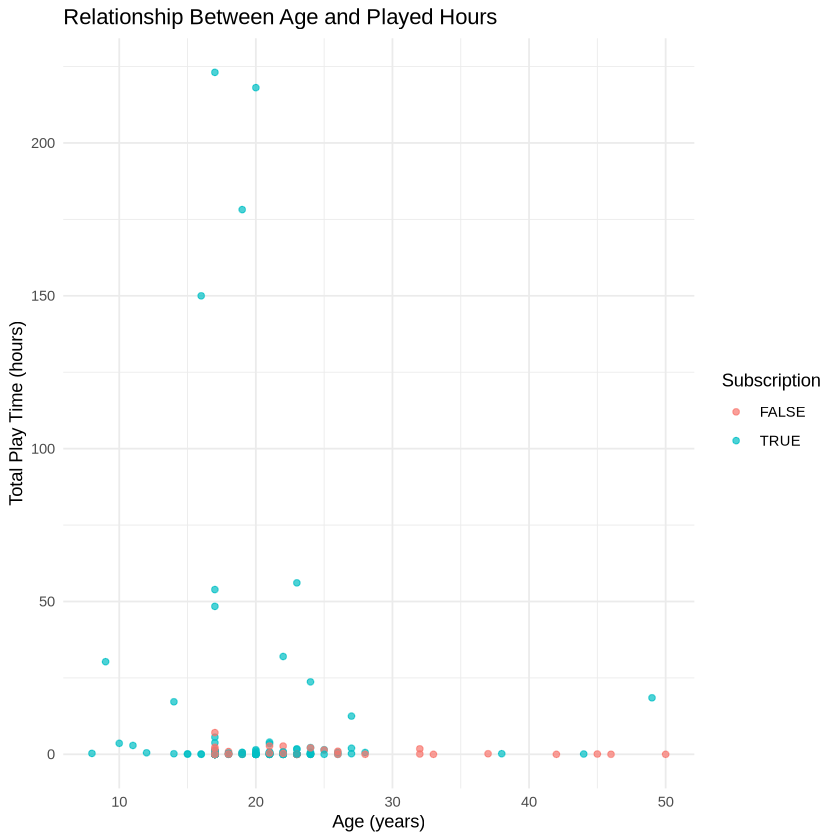

In [58]:
ggplot(players, aes(x = Age, y = played_hours,  color = as.factor(subscribe))) +
  geom_point(alpha = 0.7) +
  labs(
    title = "Relationship Between Age and Played Hours",
    x = "Age (years)",
    y = "Total Play Time (hours)",
    color = "Subscription"
  ) +
  theme_minimal()

The scatterplot visualizes the relationship between total play time and the age of the players, with color indicating whether or not they were subscribed. It shows that most players have quite little hours played, with some outliers around the 17-20 age range. There is no clear relationship betweeen the hours played and age, however, it seems to show that most players in the higher age range were not subscribed.

## 4\.  Methods and Plan

**Method: K-Nearest Neighbors Classification**
KNN classification was chosen because it makes no assumptions about the data distributions as the scatterplot showed no clear linear relationship between the predictors. Classification was chosen because subscription status was a factor and it relies on a majority vote of the k nearest neighbors, making it easier to interpret.

**Assumptions**
Predictors need to be standardized in order to ensure equal weighting of the predictors because KNN is distance based, and there must be sufficient data points to make reliable predictions.

**Limitations**
KNN classification is memory intensive compared to other methods, and requires significantly more data when number of predictors increase.

**Comparing and selecting Model**
k-fold cross-validation will be used on the training set to find an optimal K that gives the best accuracy in classifying subscription.

**Data processing**
Data will be split into 75% training 25% test, and then k-fold cross validation will be performed to tune the k using 5 folds. Predictors are scaled to mean of 0 and standard deviation of 1.